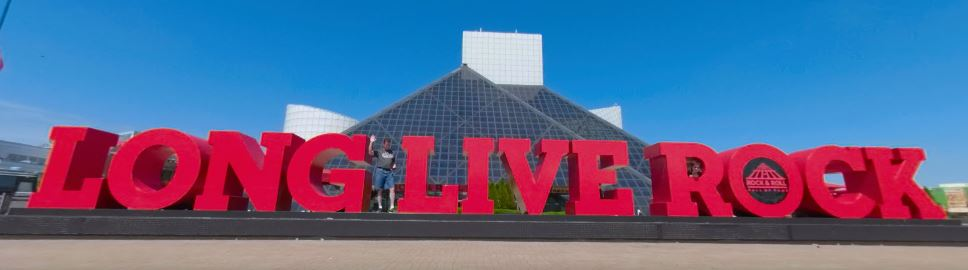



# A decades comparison of song characteristics
### Analyses utilizing radar plots to compare trend movements in song characteristics for:
**1. Decades spanning 1920 to 2021**

**2. A few of today's selected artists**

## Observations in Decade - Decade Trends



### **Import  and define dependencies**

In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import preprocessing
import plotly.graph_objects as go

### Import data set and get a sense of data structure
#### Clean up artist strings by removing [ ] and ' '

In [2]:
path = '../cleaned_data/cleaned_data.csv'
df_data = pd.read_csv(path)
df_data.dropna(axis=0, how = 'any', inplace = True)
df_data['artists'] = df_data['artists'].astype('string')
df_data['artists'] = df_data['artists'].str.strip('[]')
df_data['artists'] = df_data['artists'].str.strip("'")
df_data.head(5)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920
1,0.643000,"""Screamin' Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920


### Bin the data set in groups of 10 years
### Add new data to the end of the original dataframe

In [3]:
df_data.columns.values
df_data.dropna(axis=0, how = 'any', inplace = True)
df_data['year'].value_counts()

years = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2021]

group_names = ['1920 - 1929', '1930 - 1939', '1940 - 1949', '1950 - 1959', '1960 - 1969',
'1970 - 1979', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2019', '2020 - 2021']

year_bins = pd.cut(df_data['year'], years, labels=group_names, include_lowest=True)

df_data['Year_Range'] = year_bins

### Group the data by decade and use aggregate mean function for data columns

In [4]:
year_gb = df_data.groupby('Year_Range')
avg_scores = year_gb.mean()
avg_scores

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
Year_Range,,,,,,,,,,,,,,,
1920 - 1929,0.828618,0.569052,187984.547559,0.269667,0.096581,0.360807,5.324465,0.213763,-15.595583,0.687508,1.107889,0.252058,110.206767,0.563066,1927.201676
1930 - 1939,0.801022,0.560104,195700.790687,0.275730,0.088965,0.237505,5.184503,0.230444,-15.409327,0.688669,2.208387,0.316222,110.727323,0.569150,1935.981670
1940 - 1949,0.868905,0.474642,220980.442096,0.253642,0.050292,0.351203,5.163466,0.216093,-15.411215,0.711542,2.192819,0.153831,107.573939,0.481138,1946.154474
1950 - 1959,0.833201,0.473793,219426.371950,0.288920,0.003450,0.241403,5.020150,0.208807,-14.742984,0.719550,12.322550,0.085638,110.762306,0.474268,1955.500000
1960 - 1969,0.598717,0.494568,213899.065981,0.426992,0.000662,0.159245,5.083304,0.208459,-12.497640,0.756509,27.827381,0.055670,115.512805,0.553507,1965.499210
1970 - 1979,0.386522,0.529597,253850.744501,0.540718,0.004022,0.116773,5.117521,0.214888,-11.351780,0.738990,34.655280,0.062230,120.240577,0.585630,1975.500770
1980 - 1989,0.312831,0.542679,251329.635964,0.585165,0.026494,0.125364,5.271430,0.201750,-11.430941,0.708911,37.475302,0.062485,120.775832,0.554750,1985.500998
1990 - 1999,0.315317,0.569870,246145.824643,0.582330,0.122857,0.118006,5.326645,0.197844,-9.921968,0.720363,43.612799,0.082096,119.180740,0.547072,1995.295186
2000 - 2009,0.259802,0.568853,241707.472937,0.662086,0.121218,0.132745,5.268917,0.211714,-7.805529,0.684023,41.125540,0.084257,121.998100,0.532995,2005.784798


### Pare down the data set to include only columns of interest
### Normalize the data to enable plotting against the same y-value scale 

In [17]:
yoy_avg = avg_scores[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

x = yoy_avg
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
yoy_avg_norm = pd.DataFrame(x_scaled)

### Make series of radar charts to compare song characteristics

In [ ]:
categories = list(yoy_avg.columns)

fig = go.Figure()

for index in range(len(categories)):
    fig.add_trace(go.Scatterpolar(
      r=yoy_avg_norm.iloc[index,:],
      theta=categories,
      fill='toself',
      name = group_names[index]
    ))
    fig.update_layout(
        title = 'Song Attributes by Decade',
        font = dict(size = 12),
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )

    fig.write_image('../images/radar' + group_names[index] + '.png')
    fig.show()

# Individual Artist Top 10 Song Attributes -- Selected Artists
1. Drake
2. Taylor Swift
3. Blake Shelton

In [5]:
filt = df_data['artists']=='Drake'
df_D = df_data.loc[filt]
df_D
df_D = df_D.sort_values(by = 'popularity', ascending = False)
df_D.reset_index(drop = True, inplace = True)
df_D = df_D[0:9]

df_D_radar = df_D[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]
df_D_radar
labels = df_D_radar.columns.values

x = df_D_radar
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_D_norm = pd.DataFrame(x_scaled)

In [6]:
filt = df_data['artists']=='Taylor Swift'
df_TS = df_data.loc[filt]
df_TS = df_TS.sort_values(by = 'popularity', ascending = False)
df_TS.reset_index(drop = True, inplace = True)
df_TS = df_TS[0:9]

df_TS_radar = df_TS[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

labels = df_TS_radar.columns.values

x = df_TS_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_TS_norm = pd.DataFrame(x_scaled)

In [14]:
filt = df_data['artists']=='Blake Shelton'
df_BS = df_data.loc[filt]
df_BS = df_BS.sort_values(by = 'popularity', ascending = False)
df_BS.reset_index(drop = True, inplace = True)
df_BS = df_BS[0:9]

df_BS_radar = df_BS[['acousticness', 'danceability','duration_ms', 'energy',
       'explicit', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']]

labels = df_BS_radar.columns.values

x = df_BS_radar 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_BS_norm = pd.DataFrame(x_scaled)

## Top 10 Song Attribute Comparison
### Use radar plot to compare top 10 song atributes between the artists

In [17]:
categories = df_D_radar.columns.values

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_BS_norm.mean(axis=0),
      theta=categories,
      fill='toself',
      name='Blake Shelton'
))
fig.add_trace(go.Scatterpolar(
      r=df_D_norm.mean(axis=0),
      theta=categories,
      fill='toself',
      name='Drake'
))
fig.add_trace(go.Scatterpolar(
      r=df_TS_norm.mean(axis=0),
      theta=categories,
      fill='toself',
      name='Taylor Swift'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()
fig.write_image('../images/radar_artists.png')